Downloading data from kaggle onto a specific location for ease of accesibility

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityajn105/flickr8k")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'flickr8k' dataset.
Path to dataset files: /kaggle/input/flickr8k


In [2]:
import shutil, os

# Original KaggleHub download path
print("KaggleHub dataset path:", path)

# Define your target directory in Colab
target_dir = "/content/data/flickr8k"

# Move (or copy) files from cache to your target directory
if not os.path.exists(target_dir):
    shutil.copytree(path, target_dir)
    print("Dataset copied to:", target_dir)
else:
    print("Target folder already exists:", target_dir)


KaggleHub dataset path: /kaggle/input/flickr8k
Dataset copied to: /content/data/flickr8k


In [5]:
captions_path = os.path.join(target_dir, 'captions.txt')
with open(captions_path, 'r') as f:
  lines = f.readlines()
print(lines[1])

1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .



In [31]:
i=0
for line in lines[1:]:
  parts = line.strip().split(',',maxsplit=1)
  if len(parts)==2:
    img_id = parts[0].split("#")[0]
    caption = parts[1]
    print(f'{img_id} ------ {caption}')
    if i==2:
      break
    i+=1
print(len(lines))

1000268201_693b08cb0e.jpg ------ A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg ------ A girl going into a wooden building .
1000268201_693b08cb0e.jpg ------ A little girl climbing into a wooden playhouse .
40456


In [32]:
caption_dict = {}#dictionary to store img id with caption
for line in lines[1:]:
  parts = line.strip().split(',',maxsplit=1)
  if len(parts)==2:
    img_id = parts[0].split('#')[0]
    caption = parts[1]
    caption_dict.setdefault(img_id,[]).append(caption)

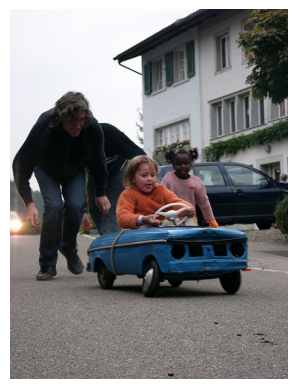

A father pushes his daughters go-kart while another girl watches
A girl riding in a toy car with a man behind her
A man pushes a child in a blue car while another child looks on .
The little girl is driving the small blue car .
Two small children play with a toy riding car in the street with a grown up .


In [37]:
import random
from PIL import Image
import matplotlib.pyplot as plt

img_name = random.choice(list(caption_dict.keys()))
img_path = os.path.join(target_dir,'Images',img_name)

img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.show()

print("\n".join(caption_dict[img_name]))